In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
X = pd.read_csv('forwarders_rating_saves_X.csv')
y = pd.read_csv('forwarders_rating_saves_y.csv')

In [3]:
#Show the first and last few records to check data is loading correctly
print(X.head())
print(y.tail())

   matches_played  aerials_l  aerials_w   assists  chances2score  clearances  \
0             1.0        0.0        0.0  0.111111       0.111922    0.250000   
1             0.0        1.0        0.0  0.027778       0.014599    0.000000   
2             1.0        0.0        0.0  0.000000       0.021898    0.018443   
3             0.0        0.0        1.0  0.055556       0.043796    0.014344   
4             1.0        0.0        0.0  0.027778       0.065693    0.030738   

   countattack  crosses_acc  crosses_inacc  dangmistakes  ...  \
0     0.230769     0.138095            0.1      0.028926  ...   
1     0.115385     0.042857            0.0      0.024793  ...   
2     0.000000     0.028571            0.0      0.037190  ...   
3     0.000000     0.119048            0.0      0.078512  ...   
4     0.000000     0.000000            0.0      0.024793  ...   

   betweenness_centrality  closeness_centrality  flow_centrality  \
0                0.090278                 0.125         0.58

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

X.dtypes

matches_played            float64
aerials_l                 float64
aerials_w                 float64
assists                   float64
chances2score             float64
clearances                float64
countattack               float64
crosses_acc               float64
crosses_inacc             float64
dangmistakes              float64
drib_success              float64
drib_unsuccess            float64
dribbled_past             float64
fouls                     float64
grduels_l                 float64
grduels_w                 float64
interceptions             float64
keypasses                 float64
lballs_acc                float64
lballs_inacc              float64
missed_penalties          float64
offsides                  float64
owngoals                  float64
passes_acc                float64
passes_inacc              float64
poss_lost                 float64
rcards                    float64
shots_offtarget           float64
shots_ontarget            float64
shotsblocked  

In [5]:
import pandas as pd

# Assuming X_train_corr is your DataFrame
df = X

# Iterate through each column and check for columns with a single unique value
single_value_columns = [column for column in df.columns if df[column].nunique() == 1]

# Print columns with a single unique value
print("Columns with a single unique value:")
for column in single_value_columns:
    print(column)

Columns with a single unique value:


In [6]:
X.shape

(416, 48)

In [7]:
X.columns

Index(['matches_played', 'aerials_l', 'aerials_w', 'assists', 'chances2score',
       'clearances', 'countattack', 'crosses_acc', 'crosses_inacc',
       'dangmistakes', 'drib_success', 'drib_unsuccess', 'dribbled_past',
       'fouls', 'grduels_l', 'grduels_w', 'interceptions', 'keypasses',
       'lballs_acc', 'lballs_inacc', 'missed_penalties', 'offsides',
       'owngoals', 'passes_acc', 'passes_inacc', 'poss_lost', 'rcards',
       'shots_offtarget', 'shots_ontarget', 'shotsblocked', 'stop_shots',
       'tackles', 'tballs_acc', 'tballs_inacc', 'touches', 'wasfouled',
       'ycards', 'degree_centrality', 'betweenness_centrality',
       'closeness_centrality', 'flow_centrality', 'betweenness2goals',
       'game_duration', 'flow_success', 'minutesPlayed', 'pos_role_FW',
       'pos_role_FWL', 'pos_role_FWR'],
      dtype='object')

In football (soccer), player positions are grouped into four main categories: Goalkeepers, Defenders, Midfielders, and Forwards. Each of the columns you mentioned in your dataset corresponds to a specific position within these categories. Here’s a detailed breakdown:

Goalkeepers (GK)
GK (Goalkeeper): The primary role is to prevent the opposing team from scoring by guarding the goal. Goalkeepers are the only players allowed to use their hands, but only within the penalty area.
Defenders
LB (Left Back): A defender positioned on the left side, responsible for preventing opposition attacks down the right wing.
LCB (Left Center Back): A central defender on the left side of the defense.
CB (Center Back): Central defenders who protect the area directly in front of the goal.
RCB (Right Center Back): A central defender on the right side of the defense.
RB (Right Back): A defender positioned on the right side, responsible for preventing opposition attacks down the left wing.
LWB (Left Wing Back): Similar to a left back but with more offensive duties, often seen in formations with three central defenders.
RWB (Right Wing Back): Similar to a right back but with more offensive duties, often seen in formations with three central defenders.
Midfielders
CDM (Center Defensive Midfielder): Positioned in front of the defenders, focusing on intercepting the ball and breaking up opposition plays.
LDM (Left Defensive Midfielder): A defensive midfielder on the left side.
RDM (Right Defensive Midfielder): A defensive midfielder on the right side.
CM (Center Midfielder): Plays centrally, linking defense and attack, often covering both defensive and offensive roles.
LCM (Left Center Midfielder): A central midfielder leaning towards the left.
RCM (Right Center Midfielder): A central midfielder leaning towards the right.
CAM (Center Attacking Midfielder): Positioned behind the forwards, focusing on creating scoring opportunities.
LAM (Left Attacking Midfielder): An attacking midfielder on the left side.
RAM (Right Attacking Midfielder): An attacking midfielder on the right side.
LM (Left Midfielder): Positioned on the left side of the midfield, balancing defense and attack.
RM (Right Midfielder): Positioned on the right side of the midfield, balancing defense and attack.
Forwards
ST (Striker): The primary goal-scorer, positioned closest to the opponent's goal.
LS (Left Striker): A forward on the left side of the attack.
RS (Right Striker): A forward on the right side of the attack.
CF (Center Forward): Similar to a striker but may play slightly deeper, involved in both scoring and assisting.
LF (Left Forward): Positioned on the left side, slightly behind the main striker.
RF (Right Forward): Positioned on the right side, slightly behind the main striker.
LW (Left Winger): Positioned on the left wing, focused on delivering crosses and creating scoring opportunities from wide positions.
RW (Right Winger): Positioned on the right wing, focused on delivering crosses and creating scoring opportunities from wide positions.
These groupings ensure a balanced distribution of responsibilities on the field, with each position playing a crucial role in the team's overall strategy​ (Football Guide)​​ (Jobs In Football)​​ (Soccermodo)​.

https://www.football-guide.com/soccer-info/soccer-positions-explained.html

https://jobsinfootball.com/blog/soccer-positions/

https://soccermodo.com/soccer-positions/






In [8]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd


# Perform feature selection using SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k='all')  # Select all features
selector.fit(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_scores)

                   Feature        Score
0                  tackles  2268.672206
1              crosses_acc  1149.269885
2               stop_shots  1090.027618
3                  assists   692.747222
4           shots_ontarget   672.630185
5               tballs_acc   568.537785
6        degree_centrality   524.835459
7             passes_inacc   524.754772
8          shots_offtarget   469.104232
9                keypasses   459.321065
10              lballs_acc   389.371943
11            dangmistakes   381.567259
12                  rcards   343.646764
13           interceptions   315.443117
14                  ycards   298.783819
15               grduels_l   286.778081
16  betweenness_centrality   279.066190
17            lballs_inacc   243.325144
18               wasfouled   240.880198
19                owngoals   233.102813
20        missed_penalties   206.653019
21           chances2score   198.905786
22                   fouls   190.534066
23             countattack   181.883951


C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression


# Perform feature selection using SelectKBest with mutual_info_regression
selector = SelectKBest(score_func=mutual_info_regression, k='all')  # Select all features
selector.fit(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_scores)

                   Feature     Score
0                  tackles  0.697904
1              crosses_acc  0.481183
2           shots_ontarget  0.462505
3        degree_centrality  0.450225
4               stop_shots  0.430810
5                  assists  0.424140
6          shots_offtarget  0.408459
7                keypasses  0.403823
8                   rcards  0.361338
9               lballs_acc  0.356221
10            dangmistakes  0.350147
11  betweenness_centrality  0.336628
12              tballs_acc  0.332824
13            passes_inacc  0.315104
14           minutesPlayed  0.309952
15                offsides  0.288435
16           interceptions  0.282773
17               grduels_l  0.273939
18            lballs_inacc  0.272585
19           crosses_inacc  0.255852
20        missed_penalties  0.231616
21           chances2score  0.231246
22                   fouls  0.226807
23               wasfouled  0.222874
24                owngoals  0.221819
25    closeness_centrality  0.217029
2

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                   Feature  Importance
0                  tackles    0.361185
1              crosses_acc    0.095444
2           shots_ontarget    0.089730
3               stop_shots    0.083142
4                  assists    0.076450
5            minutesPlayed    0.055065
6        degree_centrality    0.045485
7             passes_inacc    0.021246
8          shots_offtarget    0.015870
9             pos_role_FWL    0.015864
10               wasfouled    0.009564
11               keypasses    0.008121
12              lballs_acc    0.007957
13            dangmistakes    0.007232
14  betweenness_centrality    0.006896
15              passes_acc    0.006655
16              tballs_acc    0.005976
17           interceptions    0.005036
18       betweenness2goals    0.004951
19            lballs_inacc    0.004631
20           crosses_inacc    0.004535
21                  rcards    0.004483
22            flow_success    0.003598
23                offsides    0.003564
24             countattac

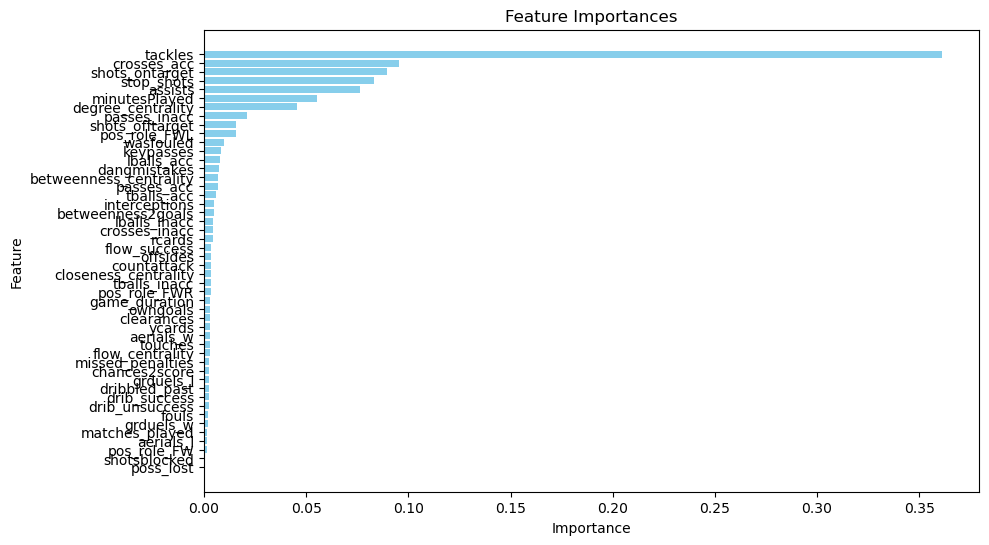

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

# Fit an ExtraTreesRegressor model
model = ExtraTreesRegressor(random_state=42)
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [11]:
import pandas as pd

# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
data.corr()

,matches_played,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration,flow_success,minutesPlayed,pos_role_FW,pos_role_FWL,pos_role_FWR,goals
matches_played,1.000000,-0.635504,-0.624802,0.206019,0.336479,0.317183,0.007995,0.212831,0.248352,0.146348,-0.155421,-0.097489,0.058736,-0.025597,0.057349,0.086485,0.279397,0.207926,0.078804,0.097584,-0.007278,0.043438,0.104594,0.134965,0.243598,0.049531,0.039546,0.156337,0.163015,0.035110,0.185333,0.201017,0.121499,0.217469,0.107753,0.072153,0.093358,0.109184,0.170949,0.167674,-0.152896,-0.025225,-0.089685,-0.336228,0.024264,0.135034,0.054317,0.043103,0.179783
aerials_l,-0.635504,1.000000,-0.205778,-0.125450,-0.209645,-0.194916,-0.040153,-0.119099,-0.160523,-0.078905,0.093698,0.021450,-0.041321,0.047286,-0.028551,-0.064645,-0.165400,-0.114699,-0.022700,-0.048957,0.029143,-0.000641,-0.049565,-0.115841,-0.137271,-0.031477,-0.005500,-0.091555,-0.095511,0.002411,-0.101950,-0.108934,-0.045834,-0.124102,-0.090212,-0.017815,-0.020485,-0.052678,-0.048967,-0.103435,0.118458,0.007326,0.069514,0.245218,0.028596,-0.085815,0.005822,-0.032543,-0.088947
aerials_w,-0.624802,-0.205778,1.000000,-0.134259,-0.214468,-0.204905,0.030472,-0.149315,-0.152446,-0.105697,0.102237,0.101871,-0.032660,-0.015375,-0.043815,-0.044244,-0.186862,-0.147547,-0.076926,-0.074175,-0.020246,-0.054408,-0.082445,-0.053918,-0.169934,-0.030947,-0.044561,-0.105565,-0.110028,-0.046938,-0.131803,-0.144620,-0.107644,-0.150134,-0.045345,-0.073435,-0.097611,-0.085115,-0.167152,-0.107920,0.073998,0.024563,0.043375,0.178177,-0.059671,-0.084370,-0.074731,-0.021722,-0.137919
assists,0.206019,-0.125450,-0.134259,1.000000,0.782331,0.653532,0.600835,0.863003,0.656260,0.812521,0.554063,0.651749,0.313410,0.685607,0.764305,0.663090,0.796249,0.901277,0.862169,0.784981,0.644336,0.597780,0.753369,0.371205,0.803579,0.056245,0.808062,0.885830,0.927955,0.181455,0.851811,0.856259,0.771394,0.548222,0.751120,0.627806,0.716875,0.902795,0.771425,0.603867,0.071883,0.094773,0.109775,-0.006530,0.188202,-0.066597,0.138376,0.196576,0.791158
chances2score,0.336479,-0.209645,-0.214468,0.782331,1.000000,0.885521,0.317494,0.656798,0.780071,0.541724,0.194293,0.300910,0.119129,0.352079,0.508644,0.512338,0.813908,0.747453,0.583586,0.644193,0.357029,0.389822,0.629422,0.414629,0.674305,0.094978,0.513845,0.728032,0.732423,0.199722,0.644026,0.615559,0.504791,0.578999,0.577788,0.378345,0.469419,0.666665,0.680668,0.630882,-0.007040,0.141509,0.059768,-0.082045,0.089480,-0.013233,0.009953,0.185119,0.569675
clearances,0.317183,-0.194916,-0.204905,0.653532,0.885521,1.000000,0.267268,0.575495,0.763322,0.453950,0.101800,0.188756,0.075434,0.242162,0.361754,0.429056,0.725133,0.608977,0.443406,0.499356,0.278612,0.327697,0.561521,0.378376,0.542946,0.020641,0.403969,0.623833,0.611580,0.143565,0.554903,0.498223,0.385241,0.550994,0.445915,0.276349,0.374503,0.563529,0.541493,0.529469,0.015404,0.155869,0.076674,-0.045645,0.063005,0.009659,-0.024568,0.171011,0.449428
countattack,0.007995,-0.040153,0.030472,0.600835,0.317494,0.267268,1.000000,0.596112,0.301718,0.598506,0.630581,0.614402,0.305098,0.605444,0.567830,0.484137,0.462701,0.585754,0.620867,0.529043,0.614521,0.480077,0.531599,0.248122,0.461716,0.035186,0.689024,0.625197,0.658166,0.113093,0.593185,0.590255,0.594100,0.259033,0.490295,0.510029,0.496087,0.685596,0.475290,0.361379,0.170436,0.057487,0.155486,0.136819,0.309432,-0.009858,0.236591,0.171006,0.552480
crosses_acc,0.212831,-0.119099,-0.149315,0.863003,0.656798,0.575495,0.596112,1.000000,0.597817,0.808308,0.525782,0.616231,0.3

<Axes: >

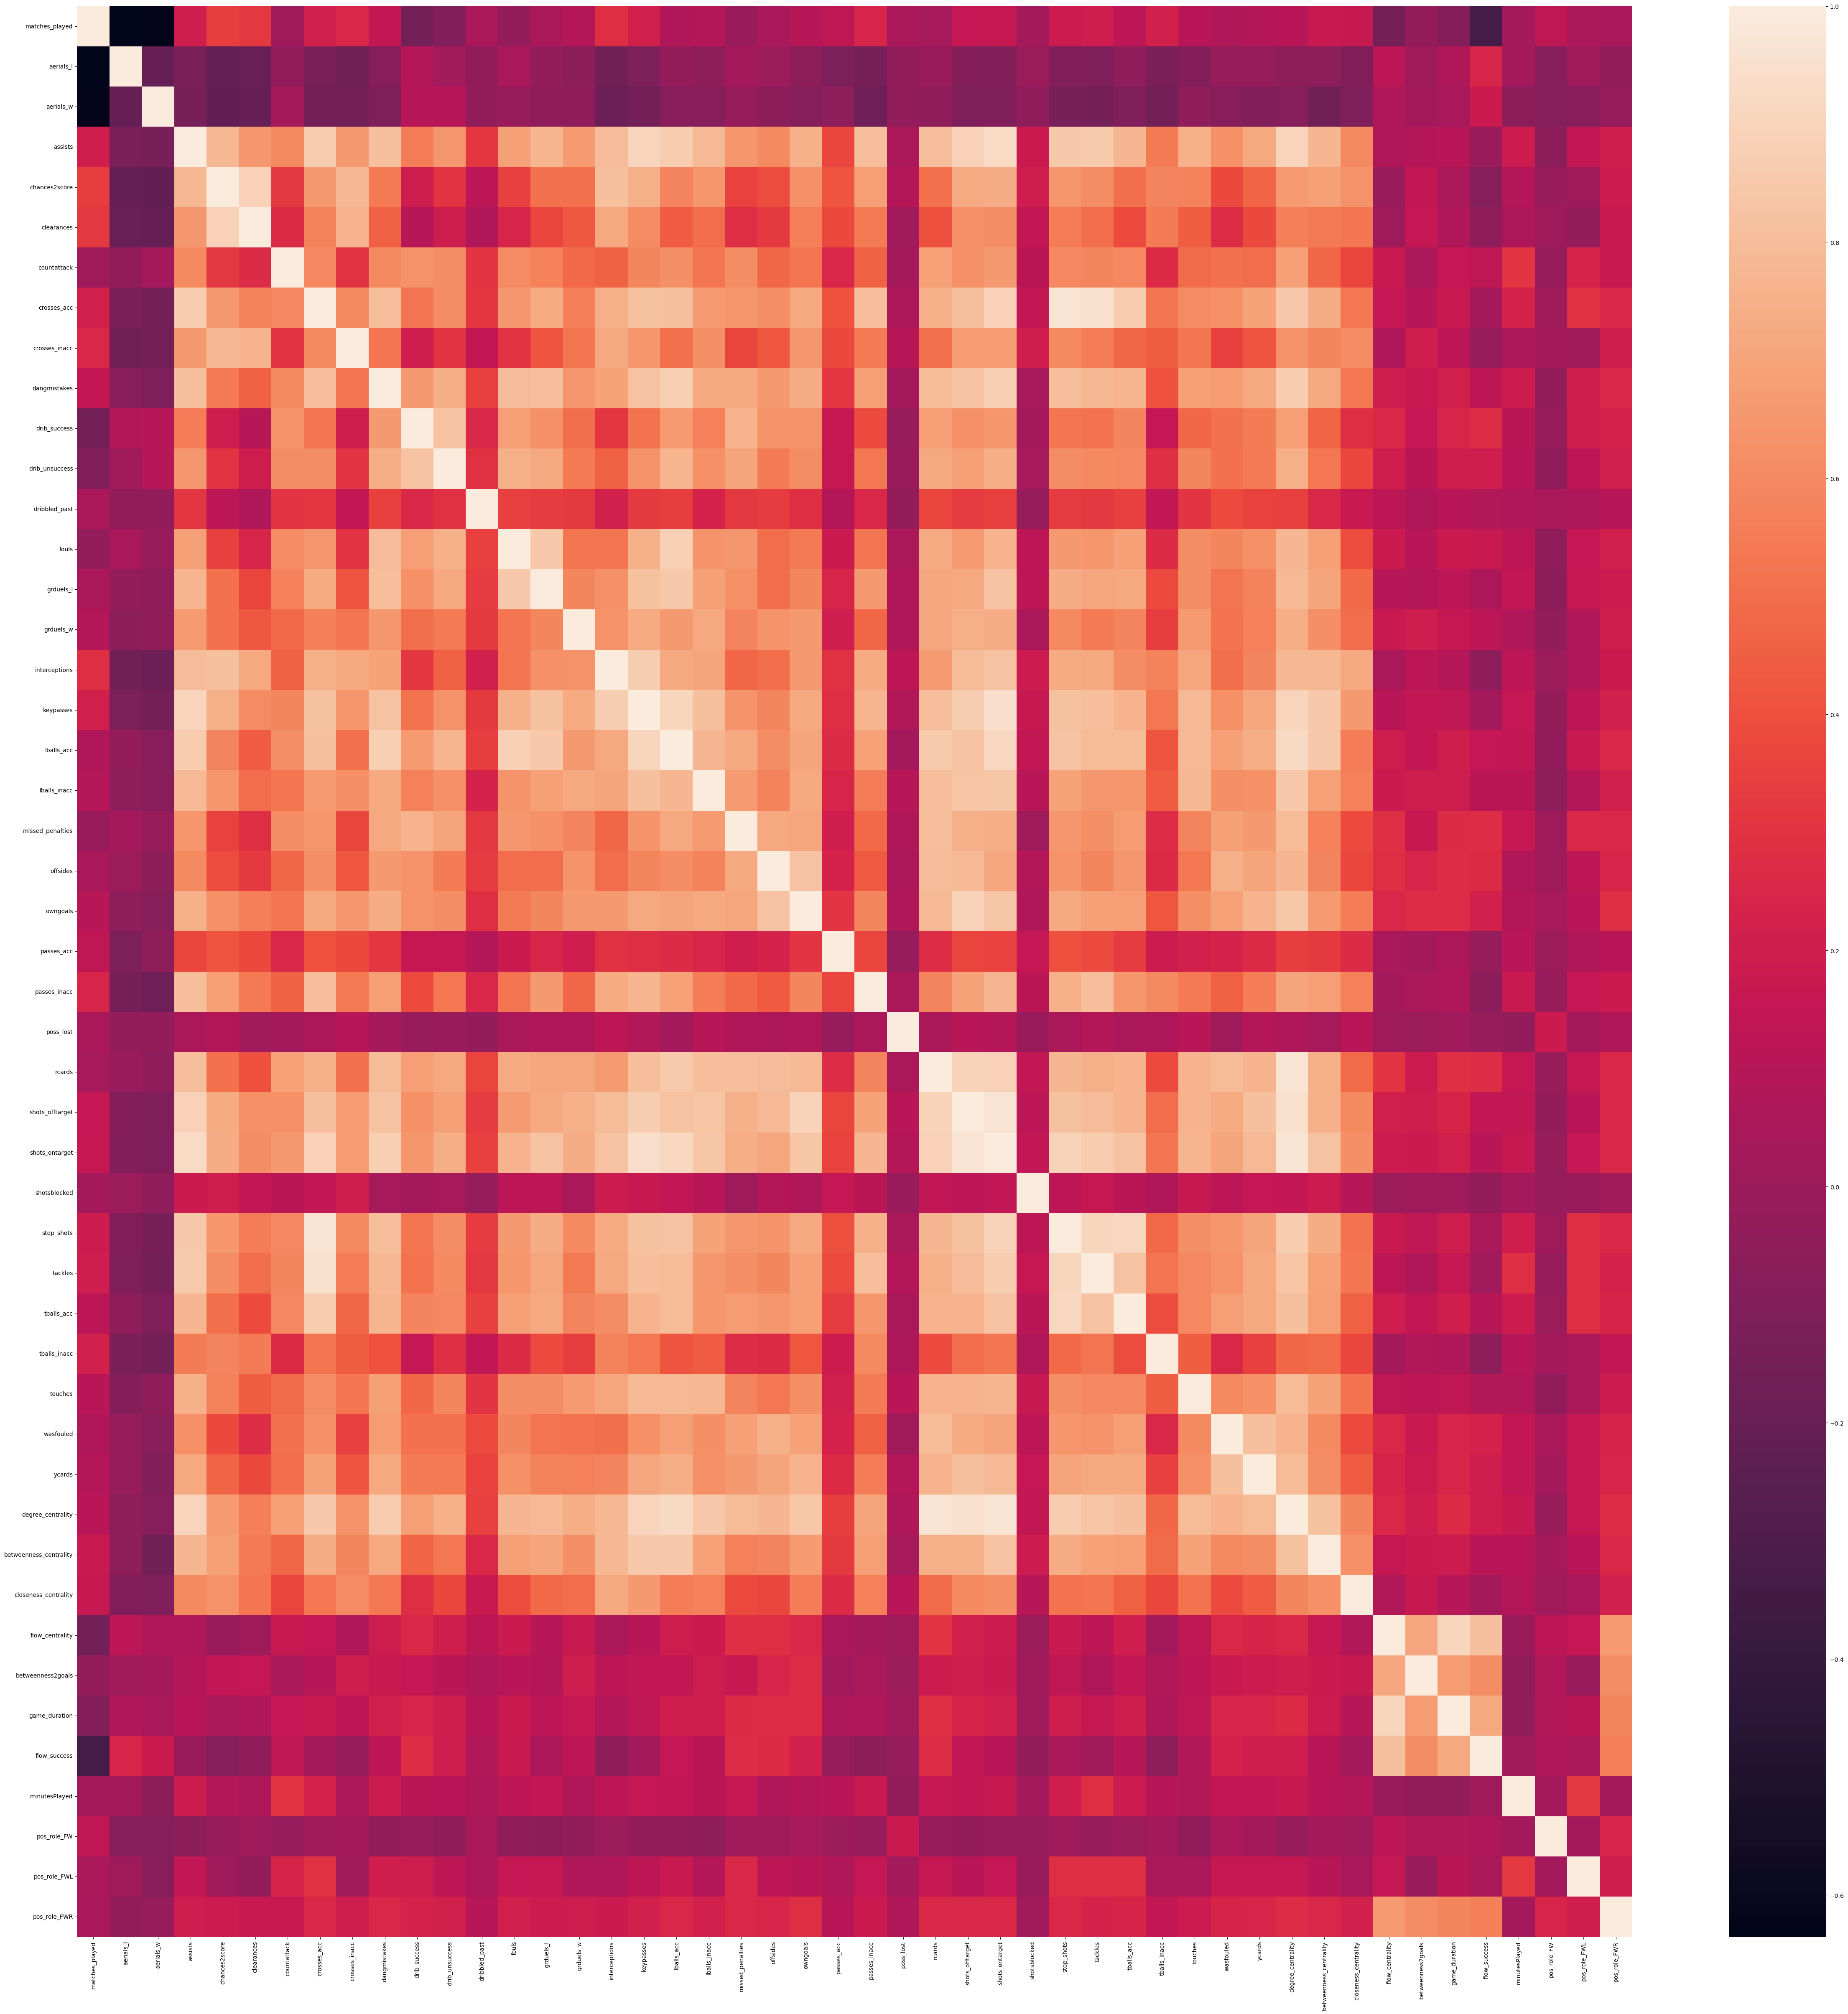

In [12]:
corr = data.drop(columns=['goals'], axis=1).corr()
top_features = corr.index
plt.figure(figsize=(60,60))
sns.heatmap(data[top_features].corr(), annot=False)

In [13]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [14]:
threshold = 0.8
correlation(data.drop(columns=['goals'], axis=1), threshold)

{'betweenness_centrality',
 'clearances',
 'crosses_acc',
 'dangmistakes',
 'degree_centrality',
 'drib_unsuccess',
 'flow_success',
 'game_duration',
 'grduels_l',
 'interceptions',
 'keypasses',
 'lballs_acc',
 'lballs_inacc',
 'owngoals',
 'passes_inacc',
 'rcards',
 'shots_offtarget',
 'shots_ontarget',
 'stop_shots',
 'tackles',
 'tballs_acc',
 'ycards'}

In [15]:
#check the columns to know which other they are correlated with
#check the columns to know which other they are correlated with
def correlated_columns(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    correlated_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                col_corr.add(colname1)
                col_corr.add(colname2)
                correlated_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

    return col_corr, correlated_pairs

In [16]:
threshold = 0.8
col_corr, correlated_pairs = correlated_columns(data.drop(columns=['goals'], axis=1), threshold)

print("Highly correlated columns:")
print(col_corr)

print("\nPairs of highly correlated columns with their correlation coefficients:")
for pair in correlated_pairs:
    print(pair)

Highly correlated columns:
{'shots_ontarget', 'passes_inacc', 'interceptions', 'grduels_l', 'flow_success', 'drib_unsuccess', 'shots_offtarget', 'game_duration', 'assists', 'lballs_inacc', 'rcards', 'owngoals', 'chances2score', 'tballs_acc', 'lballs_acc', 'crosses_acc', 'missed_penalties', 'offsides', 'keypasses', 'ycards', 'tackles', 'wasfouled', 'stop_shots', 'drib_success', 'fouls', 'dangmistakes', 'betweenness_centrality', 'degree_centrality', 'flow_centrality', 'clearances'}

Pairs of highly correlated columns with their correlation coefficients:
('clearances', 'chances2score', 0.8855206249188603)
('crosses_acc', 'assists', 0.863002919828252)
('dangmistakes', 'assists', 0.8125214216664662)
('dangmistakes', 'crosses_acc', 0.8083078740309053)
('drib_unsuccess', 'drib_success', 0.8265573141280401)
('grduels_l', 'dangmistakes', 0.8075281667427484)
('grduels_l', 'fouls', 0.8502808155274062)
('interceptions', 'chances2score', 0.8139075458612167)
('keypasses', 'assists', 0.90127723668026

In [43]:
# Save X and y to CSV files
#change to goalkeeprs features later
#X.to_csv('defenders_featusres.csv', index=False)
#y.to_csv('defenders_target.csv', index=False)

#print("Files saved: 'defenders_features.csv' and 'defenders_target.csv'")

Files saved: 'defenders_features.csv' and 'defenders_target.csv'


In [ ]:
#for feature enginnering, we can do averages of players of different matches in the same season